# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive1/thesis_cases/HPT_andy_post/baseline/convergence/')
casedir=os.getcwd()

In [4]:
name_for_files='fine_grid'

In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True

In [6]:
mon_point=False
if mon_point:
    mon_point_id=2
    var_index=7
    skip=10
    save_fig=False
    #======================================
    #  end user input
    #======================================

    start_name='monitor_point_%i'%mon_point_id
    files= os.listdir('../mon_point/')
    red_files=[]
    for f in files:
        if f.startswith(start_name):
            temp='../mon_point/'+f
            red_files.append(temp)

    red_files.sort()
    time=[]
    step=[]
    var=[]
    for f in red_files:
        file1=open(f,'r')
        count=1
        for line in file1:
            if count==0:
                li=line.split()
                step.append(float(li[0]))
                time.append(float(li[1]))
                var.append(float(li[var_index]))
                count=10
            else:
                count-=count
    plt.figure()
    plt.plot(step,var)
    plt.xlabel('timestep')
    plt.ylabel('var')
    if save_fig:
        plt.savefig('time_hist_var.pdf')
     

In [7]:
#get list of directories to loop though
postdir =  os.walk('.').next()[1]
postdir = [casedir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [ ]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-.3,-0.2],[-.3,0.7]],[[1.1,-.75],[1.1,0.4]],[[1.26,-.75],[1.26,0.4]],[[1.05,-.75],[1.05,0.4]]]

In [ ]:
#Extract lines from each convergence case
inf=lh.infile('../vki3d.in')
dt=inf.dth
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1].split('_')
        d1=float(d[0])*dt
        d2=float(d[2])*dt
        d="%4.1f to %4.1f"%(d1,d2)
        wake[-1].extr_line(j[0],j[1],200,i+'/ASME_post.bin',force_read=True,label=d)
        wake[-1].order_ymin()


In [ ]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,21))




for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_TI_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_TI_%s_%i.pdf"%(name_for_files,j))

In [ ]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,2))
plot_ids.append(wake[0].l[0].var.get_index(216,3))
plot_ids.append(wake[0].l[0].var.get_index(216,16))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_mean_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_mean_%s_%i.pdf"%(name_for_files,j))

In [ ]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,1))
plot_ids.append(wake[0].l[0].var.get_index(216,4))
plot_ids.append(wake[0].l[0].var.get_index(216,5))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_therm_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_therm_%s_%i.pdf"%(name_for_files,j))

In [ ]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(216,10))
plot_ids.append(wake[0].l[0].var.get_index(216,11))
plot_ids.append(wake[0].l[0].var.get_index(216,12))
plot_ids.append(wake[0].l[0].var.get_index(216,13))


for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tau_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tau_%s_%i.pdf"%(name_for_files,j))  

In [ ]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(209,8))
plot_ids.append(wake[0].l[0].var.get_index(209,5))
plot_ids.append(wake[0].l[0].var.get_index(209,9))



for j in range(4):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,1,fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tke_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tke_%s_%i.pdf"%(name_for_files,j))

In [ ]:
ls

## Selected case

In [8]:
case_index=4
filen='../convergence_new/'+postdir[case_index].split('/')[-1]+'/STAT_cont.bin'
print filen

../convergence_new/2132100_to_2580100/STAT_cont.bin


In [9]:
cascade=l.cascade_mean(-0.3,1.26,filename=filen,infile='../vki3d.in',Refplane='Outlet',chord=1.75)

reading data from file previously extracted
reading data from file previously extracted
extract line from (i,j) 384 1  to  384 1184  in block  4 1184
reading data from file previously extracted
4
extract line from (i,j) 384 1  to  384 480  in block  3 480
reading data from file previously extracted
4
extract line from (i,j) 384 1  to  384 1184  in block  5 1184
reading data from file previously extracted
4
extract line from (i,j)

/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1331: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1334: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1336: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1434: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.len_el==None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1372: RuntimeWarning: invalid value encountered in double_scalars
  self.nondim[i]=(self.data[i,index]-self.data[0,index])/len_line


 384 1  to  384 480  in block  7 480
reading data from file previously extracted
4


/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1372: RuntimeWarning: divide by zero encountered in double_scalars
  self.nondim[i]=(self.data[i,index]-self.data[0,index])/len_line


file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


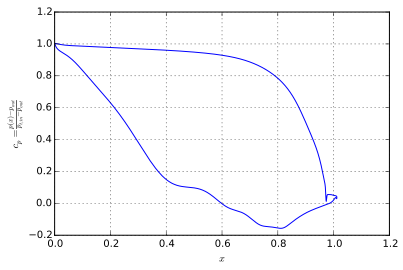

In [10]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.cp)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_p= \\frac{p(x)-p_{out}}{p_{t,in}-p_{out}}$')
tikz_save("cp_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


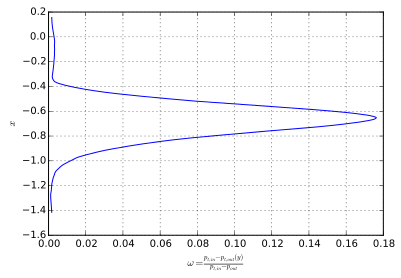

In [11]:
plt.figure()
plt.plot(cascade.loss_mix,cascade.outlet.data[:,1])
plt.grid()
plt.ylabel('$x$')
plt.xlabel('$\omega= \\frac{p_{t,in}-p_{t,out}(y)}{p_{t,in}-p_{out}}$')
tikz_save("wake_loss.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [12]:
cascade.report_integral_mixed_out()

Isentropic Reynolds Number:    537759.93176
Isentropic Mach Number:    0.9178643804
Isentropic Reynolds Number:    546241.49912 (inlet mass averaged)
Isentropic Mach Number:    0.9178586701 (inlet mass averaged)
Isentropic exit Velocity:    5.6608586244
Mixed out loss    0.0347921915
Inlet angle:    0.0127415674
Inlet Mach number:    0.1481585067
Inlet stagnation pressure:   33.0345666068
Inlet stagnation Temperature:    1.8298090201
Inlet static pressure:   32.5319426262
Inlet static Temperature:    1.8218109265
Outlet angle:  -75.0466565065
Outlet Mach number:    0.9044027770
Outlet stagnation pressure:   32.5516544785
Outlet stagnation Temperature:    1.8234774440
Outlet static pressure:   19.1546668888
Outlet static Temperature:    1.5671148810
Outlet density:    0.6844816285


# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

In [ ]:
import mon_points as mp

## Write out data to compare cases

In [ ]:
case_index=0
print postdir[case_index]
stat_file=postdir[case_index]+'/ASME_post.bin'

In [ ]:
rho_ind=wake[1].l[case_index].var.get_index(216,1)
u_ind=wake[1].l[case_index].var.get_index(216,2)
v_ind=wake[1].l[case_index].var.get_index(216,3)
p_ind=wake[1].l[case_index].var.get_index(216,5)
T_ind=wake[1].l[case_index].var.get_index(216,4)
tau11_ind=wake[1].l[case_index].var.get_index(216,10)
tau22_ind=wake[1].l[case_index].var.get_index(216,12)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
tau12_ind=wake[1].l[case_index].var.get_index(216,11)
tau33_ind=wake[1].l[case_index].var.get_index(216,13)
P_ind=wake[1].l[case_index].var.get_index(209,8)
eps_ind=wake[1].l[case_index].var.get_index(209,9)
k_ind=wake[1].l[case_index].var.get_index(207,1)
Ti_ind=wake[1].l[case_index].var.get_index(216,21)

In [ ]:
for i in range(3):
    dataset=wake[i+1].l[case_index]
    outlet_comp_file='outlet_comp_%s_%i.dat'%(name_for_files,i+1)
    of=open(outlet_comp_file,'w')
    of.write('%25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s\n'%('y','rho_bar','u_tile','v_tile','p_bar','T_tile','tau_11,','tau_22','tau_33','tau_12,','k','P','epsilon'))
    of.write('x=%15.8f, npoints = %i\n'%(dataset.data[0,0],dataset.npoints))    
    for j in range(dataset.npoints):
            of.write('%25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f\n'%(dataset.data[j,1],dataset.data[j,rho_ind],dataset.data[j,u_ind],dataset.data[j,v_ind],
                                   dataset.data[j,p_ind],dataset.data[j,T_ind],-dataset.data[j,tau11_ind],-dataset.data[j,tau22_ind],
                                   -dataset.data[j,tau33_ind],-dataset.data[j,tau12_ind],dataset.data[j,k_ind],-dataset.data[j,P_ind],dataset.data[j,eps_ind]))          
    of.close()